In [9]:
import numpy as np
from matplotlib import pyplot as plt
image_path = "assets/cat.ppm"
image2_path = "assets/portraitWritten.pgm"

In [14]:
def readPPM(image_path):
    with open(image_path, "rb") as f:
        assert(f.read(1) == b'P')
        assert(f.read(1) in [b'3',b'6'])
        assert(f.read(1) == b'\n')
        #ignore comments
        byte = f.read(1)
        if(byte == b'#'):
            while(not byte == b'\n'):
                byte = f.read(1)
        #read dimentions
        width = b''
        while(not byte == b' '):
            width += byte
            byte = f.read(1)
        width = int(width.decode("utf-8"))
        height = b''
        byte = f.read(1)
        while(not byte == b'\n'):
            height += byte
            byte = f.read(1)
        height = int(height.decode("utf-8"))
        max_grayscale_value = b''
        byte = f.read(1)
        while(not byte == b'\n'):
            max_grayscale_value += byte
            byte = f.read(1)
        max_grayscale_value = int(max_grayscale_value.decode("utf-8"))
        R = np.empty((height, width), dtype=float)
        G = np.empty((height, width), dtype=float)
        B = np.empty((height, width), dtype=float)

        for row in range(0, height):
            for col in range(0, width):
                R[row, col] = int.from_bytes(f.read(1), "big")
                G[row, col] = int.from_bytes(f.read(1), "big")
                B[row, col] = int.from_bytes(f.read(1), "big")

        return R,G,B
R,G,B = readPPM(image_path)

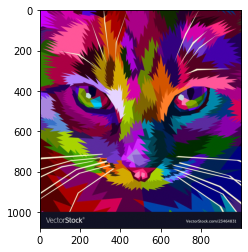

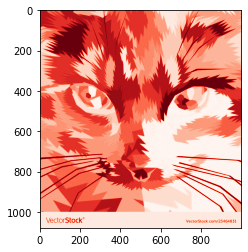

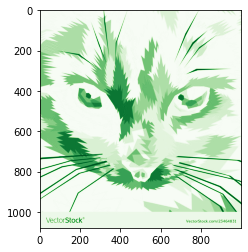

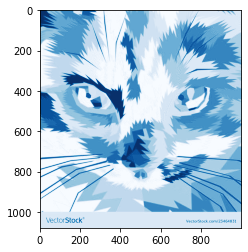

In [35]:
def showImagePPM(R,G,B):
    image = []
    height,width = R.shape
    for row in range(0, height):
        row_list = []
        for col in range(0, width):
            row_list.append([R[row,col]/255,G[row,col]/255,B[row,col]/255])
        image.append(row_list)
    plt.imshow(image)
    plt.show()
    plt.imshow(R,cmap="Reds")
    plt.show()
    plt.imshow(G,cmap="Greens")
    plt.show()
    plt.imshow(B,cmap="Blues")
    plt.show()

showImagePPM(R,G,B)

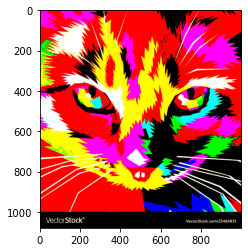

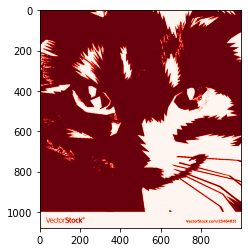

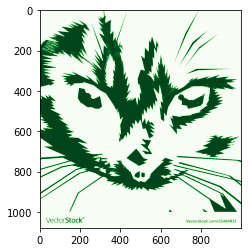

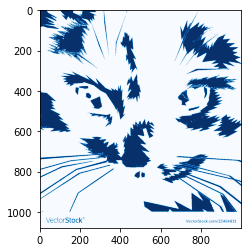

In [44]:
def seuillage_manuel(R,G,B,R_seuil,G_seuil,B_seuil):
    height,width = R.shape
    R_th = np.empty((height, width), dtype=int)
    G_th = np.empty((height, width), dtype=int)
    B_th = np.empty((height, width), dtype=int)
    for row in range(0, height):
        for col in range(0, width):
            R_th[row,col] = 0 if R[row,col] < R_seuil else 255
            G_th[row,col] = 0 if G[row,col] < G_seuil else 255
            B_th[row,col] = 0 if B[row,col] < B_seuil else 255
    return R_th,G_th,B_th

R_th,G_th,B_th = seuillage_manuel(R,G,B,50,80,150)
showImagePPM(R_th,G_th,B_th)



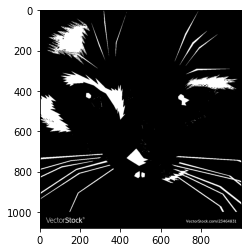

In [47]:
def seuillage_ET(R_th,G_th,B_th):
    height,width = R_th.shape
    image_th = np.empty((height, width), dtype=int)
    
    for row in range(0, height):
        for col in range(0, width):
            value = 0
            if (R_th[row,col] and G_th[row,col] and B_th[row,col]):
                value = 255
            image_th[row,col] = value
    return image_th

image_th_ET = seuillage_ET(R_th,G_th,B_th)
plt.imshow(image_th_ET, cmap="gray")
plt.show()
    


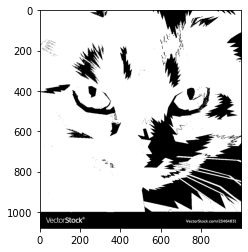

In [48]:
def seuillage_OU(R_th,G_th,B_th):
    height,width = R_th.shape
    image_th = np.empty((height, width), dtype=int)
    
    for row in range(0, height):
        for col in range(0, width):
            value = 0
            if (R_th[row,col] or G_th[row,col] or B_th[row,col]):
                value = 255
            image_th[row,col] = value
    return image_th

image_th_OU = seuillage_OU(R_th,G_th,B_th)
plt.imshow(image_th_OU, cmap="gray")
plt.show()
    